This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# xarray Rainbow5 backend

In this example, we read Rainbow5 data files using the xradar `rainbow` xarray backend.

In [1]:
import glob
import gzip
import io
import wradlib as wrl
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import xradar as xd
import datatree as xt
import xarray as xr

try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()

## Load Rainbow5 Volume Data

In [2]:
fpath = "rainbow/2013051000000600dBZ.vol"
f = wrl.util.get_wradlib_data_file(fpath)
vol = xd.io.open_rainbow_datatree(f, reindex_angle=False)

## Inspect RadarVolume

In [3]:
display(vol)

DataTree('root', parent=None)
│   Dimensions:              ()
│   Data variables:
│       volume_number        int64 0
│       platform_type        <U5 'fixed'
│       instrument_type      <U5 'radar'
│       time_coverage_start  <U20 '2013-05-10T00:00:06Z'
│       time_coverage_end    <U20 '2013-05-10T00:03:14Z'
│       longitude            float64 6.38
│       altitude             float64 116.7
│       latitude             float64 50.86
│   Attributes:
│       Conventions:      None
│       version:          None
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None
│       comment:          im/exported using xradar
│       instrument_name:  None
├── DataTree('sweep_0')
│       Dimensions:            (azimuth: 361, range: 400)
│       Coordinates:
│         * azimuth            (azimuth) float64 0.5055 1.549 2.505 ... 358.5 359.5
│           elevation          (azimuth) float64 ...
│         * range              (range) float32 125.0 375.0 625.0 ... 9.962e+04 9.988e+04
│           time               (azimuth) datetime64[ns] 2013-05-10T00:00:15.500000 .....
│           longitude          float64 ...
│           latitude           float64 ...
│           altitude           float64 ...
│       Data variables:
│           DBZH               (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float64 ...
├── DataTree('sweep_1')
│       Dimensions:            (azimuth: 361, range: 400)
│       Coordinates:
│         * azimuth            (azimuth) float64 0.5055 1.549 2.516 ... 358.5 359.5
│           elevation          (azimuth) float64 ...
│         * range              (range) float32 125.0 375.0 625.0 ... 9.962e+04 9.988e+04
│           time               (azimuth) datetime64[ns] 2013-05-10T00:00:25.621212500...
│           longitude          float64 ...
│           latitude           float64 ...
│           altitude           float64 ...
│       Data variables:
│           DBZH               (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float64 ...
├── DataTree('sweep_2')
│       Dimensions:            (azimuth: 361, range: 400)
│       Coordinates:
│         * azimuth            (azimuth) float64 0.511 1.505 2.505 ... 357.5 358.5 359.5
│           elevation          (azimuth) float64 ...
│         * range              (range) float32 125.0 375.0 625.0 ... 9.962e+04 9.988e+04
│           time               (azimuth) datetime64[ns] 2013-05-10T00:00:36.651515500...
│           longitude          float64 ...
│           latitude           float64 ...
│           altitude           float64 ...
│       Data variables:
│           DBZH               (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float64 ...
├── DataTree('sweep_3')
│       Dimensions:            (azimuth: 361, range: 400)
│       Coordinates:
│         * azimuth            (azimuth) float64 0.511 1.505 2.521 ... 357.5 358.5 359.5
│           elevation          (azimuth) float64 ...
│         * range              (range) float32 125.0 375.0 625.0 ... 9.962e+04 9.988e+04
│           time               (azimuth) datetime64[ns] 2013-05-10T00:00:46.772727500...
│           longitude          float64 ...
│           latitude           float64 ...
│           altitude           float64 ...
│       Data variables:
│           DBZH               (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode 

## Inspect root group

The `sweep` dimension contains the number of scans in this radar volume. Further the dataset consists of variables (location coordinates, time_coverage) and attributes (Conventions, metadata).

In [4]:
vol.root

DataTree('root', parent=None)
│   Dimensions:              ()
│   Data variables:
│       volume_number        int64 0
│       platform_type        <U5 'fixed'
│       instrument_type      <U5 'radar'
│       time_coverage_start  <U20 '2013-05-10T00:00:06Z'
│       time_coverage_end    <U20 '2013-05-10T00:03:14Z'
│       longitude            float64 6.38
│       altitude             float64 116.7
│       latitude             float64 50.86
│   Attributes:
│       Conventions:      None
│       version:          None
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None
│       comment:          im/exported using xradar
│       instrument_name:  None
├── DataTree('sweep_0')
│       Dimensions:            (azimuth: 361, range: 400)
│       Coordinates:
│         * azimuth            (azimuth) float64 0.5055 1.549 2.505 ... 358.5 359.5
│           elevation          (azimuth) float64 ...
│         * range              (range) float32 125.0 375.0 625.0 ... 9.962e+04 9.988e+04
│           time               (azimuth) datetime64[ns] 2013-05-10T00:00:15.500000 .....
│           longitude          float64 ...
│           latitude           float64 ...
│           altitude           float64 ...
│       Data variables:
│           DBZH               (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float64 ...
├── DataTree('sweep_1')
│       Dimensions:            (azimuth: 361, range: 400)
│       Coordinates:
│         * azimuth            (azimuth) float64 0.5055 1.549 2.516 ... 358.5 359.5
│           elevation          (azimuth) float64 ...
│         * range              (range) float32 125.0 375.0 625.0 ... 9.962e+04 9.988e+04
│           time               (azimuth) datetime64[ns] 2013-05-10T00:00:25.621212500...
│           longitude          float64 ...
│           latitude           float64 ...
│           altitude           float64 ...
│       Data variables:
│           DBZH               (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float64 ...
├── DataTree('sweep_2')
│       Dimensions:            (azimuth: 361, range: 400)
│       Coordinates:
│         * azimuth            (azimuth) float64 0.511 1.505 2.505 ... 357.5 358.5 359.5
│           elevation          (azimuth) float64 ...
│         * range              (range) float32 125.0 375.0 625.0 ... 9.962e+04 9.988e+04
│           time               (azimuth) datetime64[ns] 2013-05-10T00:00:36.651515500...
│           longitude          float64 ...
│           latitude           float64 ...
│           altitude           float64 ...
│       Data variables:
│           DBZH               (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float64 ...
├── DataTree('sweep_3')
│       Dimensions:            (azimuth: 361, range: 400)
│       Coordinates:
│         * azimuth            (azimuth) float64 0.511 1.505 2.521 ... 357.5 358.5 359.5
│           elevation          (azimuth) float64 ...
│         * range              (range) float32 125.0 375.0 625.0 ... 9.962e+04 9.988e+04
│           time               (azimuth) datetime64[ns] 2013-05-10T00:00:46.772727500...
│           longitude          float64 ...
│           latitude           float64 ...
│           altitude           float64 ...
│       Data variables:
│           DBZH               (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode 

## Inspect sweep group(s)

The sweep-groups can be accessed via their respective keys. The dimensions consist of `range` and `time` with added coordinates `azimuth`, `elevation`, `range` and `time`. There will be variables like radar moments (DBZH etc.) and sweep-dependend metadata (like `fixed_angle`, `sweep_mode` etc.).

In [5]:
display(vol["sweep_0"])

DataTree('sweep_0', parent="root")
    Dimensions:            (azimuth: 361, range: 400)
    Coordinates:
      * azimuth            (azimuth) float64 0.5055 1.549 2.505 ... 358.5 359.5
        elevation          (azimuth) float64 ...
      * range              (range) float32 125.0 375.0 625.0 ... 9.962e+04 9.988e+04
        time               (azimuth) datetime64[ns] 2013-05-10T00:00:15.500000 .....
        longitude          float64 ...
        latitude           float64 ...
        altitude           float64 ...
    Data variables:
        DBZH               (azimuth, range) float32 ...
        sweep_mode         <U20 ...
        sweep_number       int64 ...
        prt_mode           <U7 ...
        follow_mode        <U7 ...
        sweep_fixed_angle  float64 ...

## Georeferencing

In [6]:
swp = vol["sweep_0"].ds.copy()
swp = swp.assign_coords(sweep_mode=swp.sweep_mode)
swp = swp.wrl.georef.georeference()

## Inspect radar moments

The DataArrays can be accessed by key or by attribute. Each DataArray has dimensions and coordinates of it's parent dataset.

In [7]:
display(swp.DBZH)

<xarray.DataArray 'DBZH' (azimuth: 361, range: 400)>
[144400 values with dtype=float32]
Coordinates: (12/15)
  * azimuth      (azimuth) float64 0.5055 1.549 2.505 ... 357.5 358.5 359.5
    elevation    (azimuth) float64 0.6 0.6 0.6 0.6 0.6 ... 0.6 0.6 0.6 0.6 0.6
  * range        (range) float32 125.0 375.0 625.0 ... 9.962e+04 9.988e+04
    time         (azimuth) datetime64[ns] 2013-05-10T00:00:15.500000 ... 2013...
    sweep_mode   <U20 'azimuth_surveillance'
    longitude    float64 6.38
    ...           ...
    y            (azimuth, range) float64 125.0 375.0 ... 9.96e+04 9.985e+04
    z            (azimuth, range) float64 118.0 120.6 ... 1.744e+03 1.75e+03
    gr           (azimuth, range) float64 124.8 374.7 ... 9.96e+04 9.985e+04
    rays         (azimuth, range) float64 0.5055 0.5055 0.5055 ... 359.5 359.5
    bins         (azimuth, range) float32 125.0 375.0 ... 9.962e+04 9.988e+04
    spatial_ref  int64 0
Attributes:
    long_name:      Equivalent reflectivity factor H
    units:          dBZ
    standard_name:  radar_equivalent_reflectivity_factor_h

## Create simple plot

Using xarray features a simple plot can be created like this. Note the `sortby('time')` method, which sorts the radials by time.

For more details on plotting radar data see under [Visualization](../../plotting.ipynb).

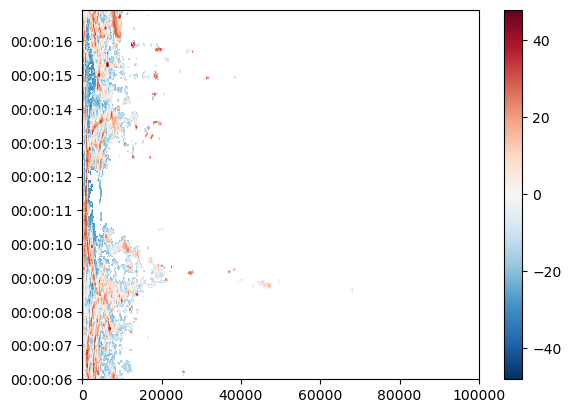

In [8]:
swp.DBZH.sortby("time").plot(x="range", y="time", add_labels=False)

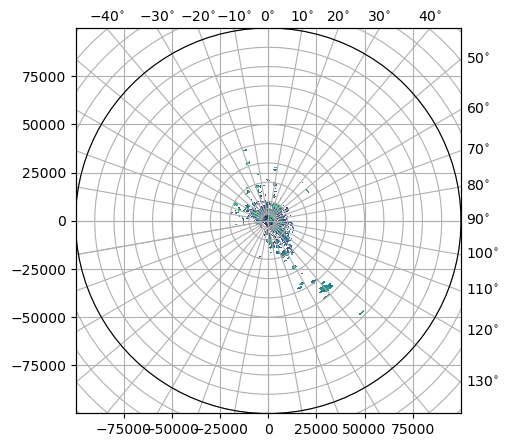

In [9]:
fig = plt.figure(figsize=(5, 5))
pm = swp.DBZH.wrl.vis.plot(crs={"latmin": 3e3}, fig=fig)

## Retrieve explicit group

In [10]:
swp_b = xr.open_dataset(
    f, engine="rainbow", group="sweep_5", backend_kwargs=dict(reindex_angle=False)
)
display(swp_b)

<xarray.Dataset>
Dimensions:            (azimuth: 361, range: 400)
Coordinates:
  * azimuth            (azimuth) float64 0.522 1.505 2.516 ... 357.5 358.5 359.5
    elevation          (azimuth) float64 ...
  * range              (range) float32 125.0 375.0 625.0 ... 9.962e+04 9.988e+04
    time               (azimuth) datetime64[ns] ...
    longitude          float64 ...
    latitude           float64 ...
    altitude           float64 ...
Data variables:
    DBZH               (azimuth, range) float32 ...
    sweep_mode         <U20 ...
    sweep_number       int64 ...
    prt_mode           <U7 ...
    follow_mode        <U7 ...
    sweep_fixed_angle  float64 ...